<a href="https://colab.research.google.com/github/judithlambersend/Machine_Learning_TP3/blob/main/Machine_Learning_TP3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# TP3 Machine Learning 
# Classe 2B
# Judith Lambersend & Romain Broet 

In [85]:
import os
from collections import Counter

import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf
from tensorflow import keras

import os
import numpy as np
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import RMSprop
import math

from keras.optimizers import SGD

from matplotlib import pyplot

from sklearn.metrics import confusion_matrix
import seaborn as sns

from keras.preprocessing import image

from tensorflow.keras.preprocessing.image import img_to_array
from PIL import Image

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
%cd /content/drive/MyDrive/Machine_Learning/train

/content/drive/MyDrive/Machine_Learning/train


In [5]:
ls


cats/  dogs/


In [6]:
# QUESTION 1

In [7]:
# On compte le nombres d'images
class_names = ['cats', 'dogs']
num_images = Counter()

for class_name in class_names:
    class_path = os.path.join('/content/drive/MyDrive/Machine_Learning/train', class_name)
    num_images[class_name] = len(os.listdir(class_path))

print(num_images)

Counter({'cats': 279, 'dogs': 278})


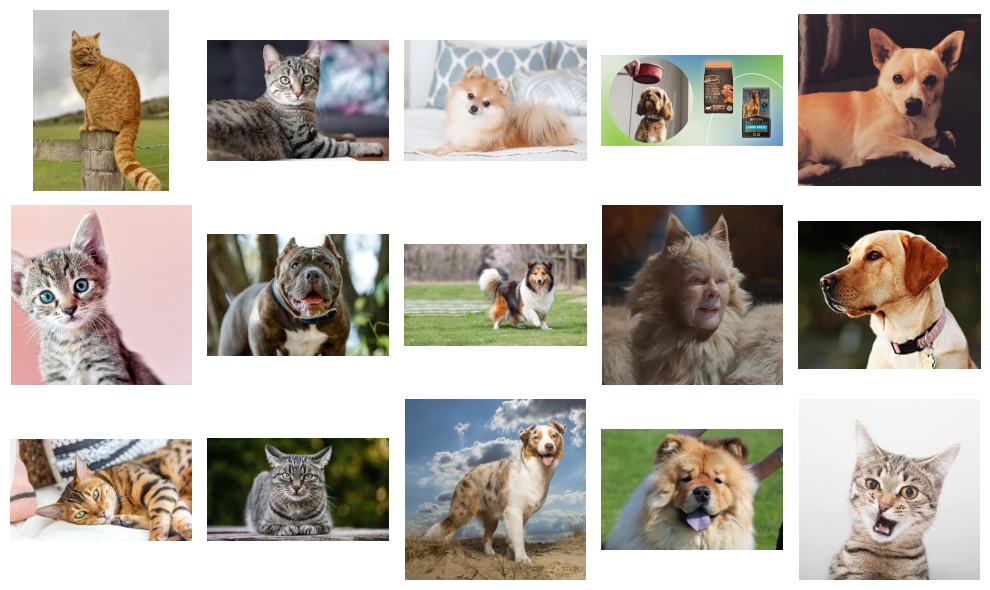

In [11]:
# Affiche les images pour être sûr qu'on peut les lire correctement 

fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(10, 6))
axes = axes.flatten()

for i in range(len(axes)):
    class_name = np.random.choice(class_names)
    class_path = os.path.join('/content/drive/MyDrive/Machine_Learning/train', class_name)
    img_path = os.path.join(class_path, np.random.choice(os.listdir(class_path))) # on choisi aléatoirement entre chiens et chats 
    img = plt.imread(img_path)
    axes[i].imshow(img)
    axes[i].axis('off')

plt.tight_layout()
plt.show()

In [12]:
# QUESTION 2

# Importer les librairies 

In [13]:
# QUESTION 3

In [60]:
# TRAIN SPLIT

data_dir = '/content/drive/MyDrive/Machine_Learning/train'

# Define parameters 
batch_size = 32
img_height = 150
img_width = 150

train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    subset='validation'
)

Found 447 images belonging to 2 classes.
Found 110 images belonging to 2 classes.


In [61]:
# TEST SPLIT

test_dir = '/content/drive/MyDrive/Machine_Learning/test'

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary'
)

Found 140 images belonging to 2 classes.


In [18]:
# QUESTION 4 & 5

In [56]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(150, 150, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='sigmoid'))

# compile model
opt = SGD(lr=0.001, momentum=0.9)

model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

# create data generator
datagen = ImageDataGenerator(rescale=1.0/255.0)

train_it = datagen.flow_from_directory('/content/drive/MyDrive/Machine_Learning/train', class_mode='binary', batch_size=32, target_size=(150, 150))
test_it = datagen.flow_from_directory('/content/drive/MyDrive/Machine_Learning/test', class_mode='binary', batch_size=32, target_size=(150, 150))

# fit model
history = model.fit(train_it, steps_per_epoch=len(train_it),validation_data=test_it, validation_steps=len(test_it), epochs=20, verbose=1)


# evaluate model
acc = model.evaluate_generator(test_it, steps=len(test_it), verbose=0)
print(acc)

Found 557 images belonging to 2 classes.
Found 140 images belonging to 2 classes.


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/20
18/18 [==============================] - 30s 2s/step - loss: 0.7652 - accuracy: 0.5530 - val_loss: 0.8585 - val_accuracy: 0.4857
Epoch 2/20
18/18 [==============================] - 29s 2s/step - loss: 0.6951 - accuracy: 0.6050 - val_loss: 0.7019 - val_accuracy: 0.5786
Epoch 3/20
18/18 [==============================] - 27s 1s/step - loss: 0.6402 - accuracy: 0.6320 - val_loss: 0.6902 - val_accuracy: 0.5714
Epoch 4/20
18/18 [==============================] - 34s 2s/step - loss: 0.6494 - accuracy: 0.6302 - val_loss: 0.7808 - val_accuracy: 0.5000
Epoch 5/20
18/18 [==============================] - 32s 2s/step - loss: 0.6313 - accuracy: 0.6535 - val_loss: 0.7782 - val_accuracy: 0.4857
Epoch 6/20
18/18 [==============================] - 31s 2s/step - loss: 0.5948 - accuracy: 0.6966 - val_loss: 0.7769 - val_accuracy: 0.4714
Epoch 7/20
18/18 [==============================] - 29s 2s/step - loss: 0.6320 - accuracy: 0.6445 - val_loss: 0.7616 - val_accuracy: 0.5000
Epoch 8/20
18/18 [==

<ipython-input-56-f97d658b6cde>:24: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  acc = model.evaluate_generator(test_it, steps=len(test_it), verbose=0)


[0.7398445010185242, 0.6357142925262451]


In [70]:
test_loss, test_acc = model.evaluate(test_generator)
print(test_acc)

test_images, test_labels = next(test_generator)
test_predictions = model.predict(test_images)
predicted_labels = (test_predictions > 0.5).astype('int32')

5/5 [==============================] - 3s 574ms/step - loss: 0.7398 - accuracy: 0.6357
0.6357142925262451
1/1 [==============================] - 0s 263ms/step


In [71]:
cm = confusion_matrix(test_labels, predicted_labels)
print(cm)

[[11  7]
 [ 3 11]]


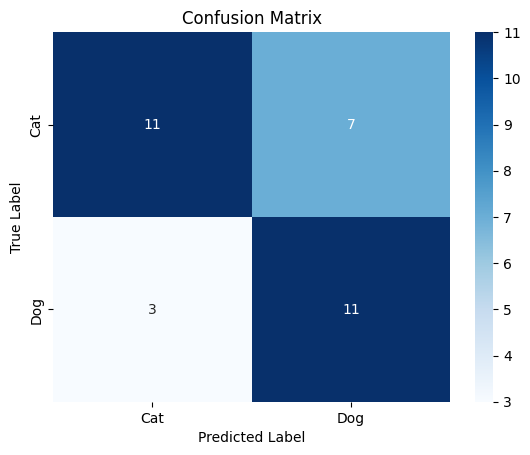

In [72]:
# Plot the confusion matrix

sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=['Cat', 'Dog'], yticklabels=['Cat', 'Dog'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

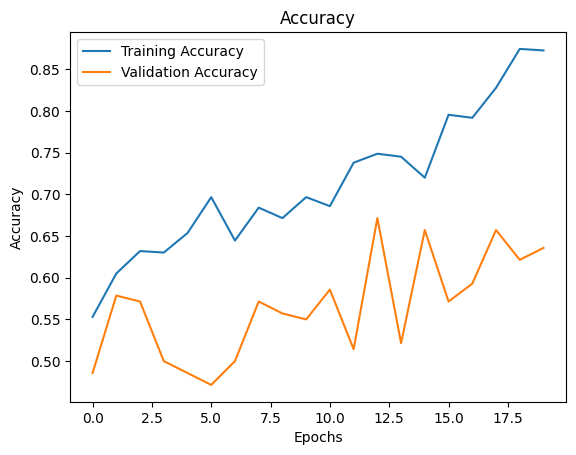

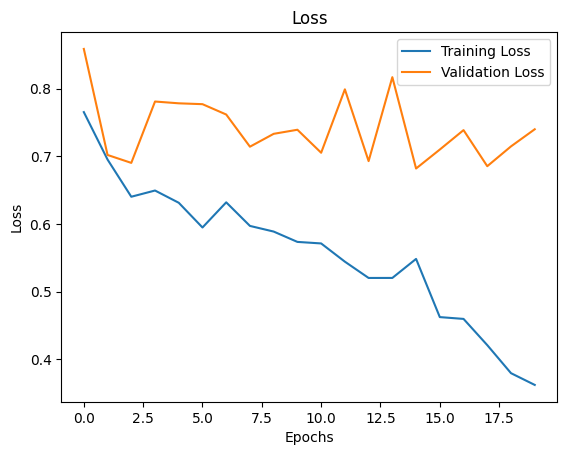

In [73]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# plot accuracy
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# plot loss
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [86]:
img_path = '/content/drive/MyDrive/Machine_Learning/dog_ML.jpg'
img = Image.open(img_path)
img = img.resize((150, 150))
img_array = img_to_array(img)
img_array = img_array.reshape((1, 150, 150, 3))
img_array /= 255.0

prediction = model.predict(img_array)
print(prediction)

1/1 [==============================] - 0s 51ms/step
[[0.2959277]]
